In [1]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [2]:
df=pd.read_csv('car_review_source.csv',sep='|')

In [3]:
train_size = 10000
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 10000
Test size: 46721


In [4]:
train_posts = df.Review[:train_size]
train_tags = df.Factory[:train_size]

test_posts = df.Review[train_size:]
test_tags = df.Factory[train_size:]

In [5]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [6]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [8]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [9]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_train[:5])

In [ ]:
print(train_tags[:5])

In [ ]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

In [ ]:
print(train_posts[0])
print(train_tags[0])
#print(y_train)

In [ ]:
print('x_test shape:', x_train.shape)

In [10]:
batch_size = 32
epochs = 10

In [11]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0409 13:15:21.481166 139631859971840 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 4s 490us/step - loss: 1.5896 - acc: 0.4743 - val_loss: 1.2447 - val_acc: 0.5960
Epoch 2/10
9000/9000 [==============================] - 4s 441us/step - loss: 1.0903 - acc: 0.6396 - val_loss: 1.1745 - val_acc: 0.5940
Epoch 3/10
9000/9000 [==============================] - 4s 447us/step - loss: 0.9053 - acc: 0.6864 - val_loss: 1.1659 - val_acc: 0.6020
Epoch 4/10
9000/9000 [==============================] - 5s 580us/step - loss: 0.7649 - acc: 0.7366 - val_loss: 1.1869 - val_acc: 0.5940
Epoch 5/10
9000/9000 [==============================] - 4s 498us/step - loss: 0.6538 - acc: 0.7829 - val_loss: 1.2113 - val_acc: 0.5970
Epoch 6/10
9000/9000 [==============================] - 5s 520us/step - loss: 0.5604 - acc: 0.8189 - val_loss: 1.2628 - val_acc: 0.5850
Epoch 7/10
9000/9000 [==============================] - 5s 588us/step - loss: 0.4720 - acc: 0.8478 - val_loss: 1.3170 - val_acc: 0.5900


In [13]:
model.save("bow.h5")

In [14]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

46721/46721 [==============================] - 5s 108us/step
Test accuracy: 0.5820508978831789


In [ ]:
x_predict_array = ['crank over all the lights']

In [ ]:
print(x_predict_array)

In [ ]:
x_predict = tokenize.texts_to_matrix(x_predict_array)

In [ ]:
print(x_predict)

In [ ]:
print(x_predict.shape)

In [ ]:
print(x_test.shape)

In [ ]:
prediction = model.predict(x_predict)

In [ ]:
print(prediction)

In [15]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

46721/46721 [==============================] - 5s 102us/step
Test score: 1.4919465216705263
Test accuracy: 0.5820508978831789


In [16]:
# Here's how to generate a prediction on individual examples
text_labels = encoder.classes_ 

In [17]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [18]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

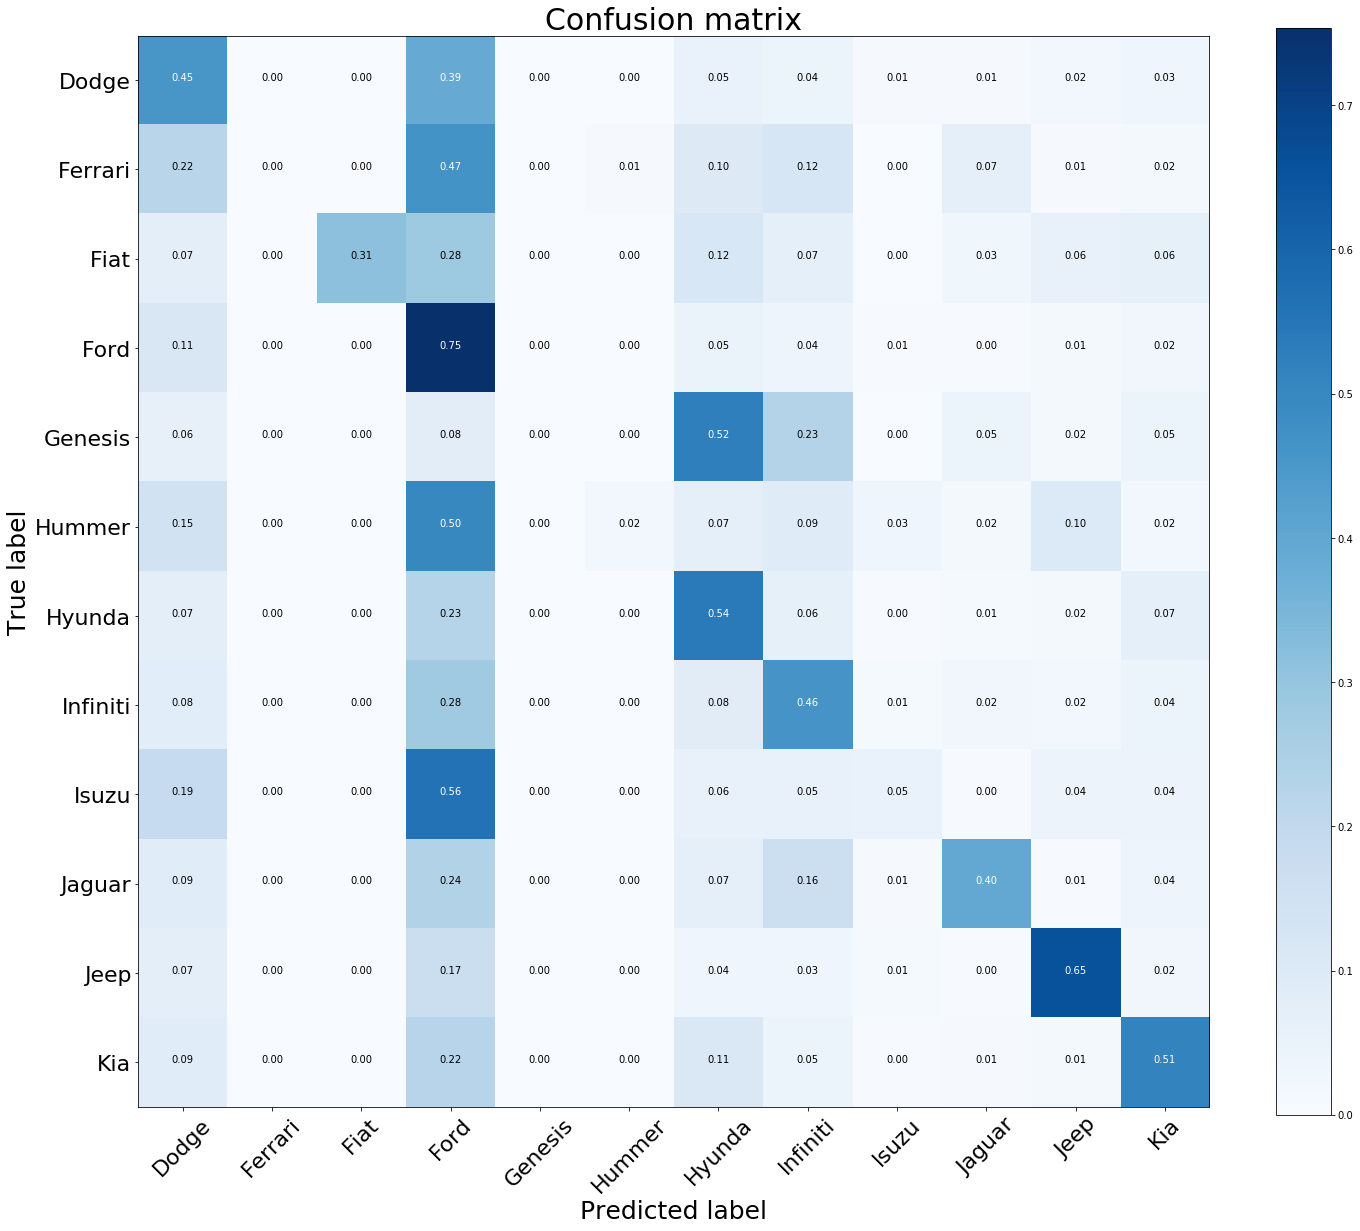

In [19]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()